# Introduction to the model

In [81]:
'''
Project based on Disney+ data avaible on Kaggle: https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows.
 Please find this code as one of my first data analysis projects, so that feedback is appreciated.

In this one, my point is to explore the data, basic statistics, correlations and trends on Disney+ platform.
Finally, there is created a model that is going to predict 
what kind of (duration, genre, and type) is the most likely to be successfull in ratings.
'''

'\nProject based on Disney+ data avaible on Kaggle: https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows.\n Please find this code as one of my first data analysis projects, so that feedback is appreciated.\n\nIn this one, my point is to explore the data, basic statistics, correlations and trends on Disney+ platform.\nFinally, there is created a model that is going to predict \nwhat kind of (duration, genre, and type) is the most likely to be successfull in ratings.\n'

First lookup on dataset and preparing dataset to work on it

In [82]:
import pandas as pd #importing pandas for dataset processing
import numpy as np #importing numpy for linear algebra


In [83]:
#loading the dataset from directory

df = pd.read_csv(r"C:\Users\annap\Documents\DATA_SCIENCE\disney_plus_titles.csv")

In [84]:
#checking basic information about dataset

In [85]:
df.shape
#we have 1450 rows and 12 columns in this dataset

(1450, 12)

In [86]:
df.head()

#As we can see, dataset need to be cleaned up.
#Inthe next cells I will transform dataset to be more likely to analise.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


Checking basic information about dataset.
We can see that most of columns data type is object, but having a look on df.head() it seems most of columns should be strings
Dtypes of most columns need to be cleaned and changes as obect is not the most convenient datatype to work on.

In [88]:
#looking for missing values
df.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [118]:
#to make dataset more convenient to work on, filling null values with 'unknown'

df.fillna('unknown', inplace = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,country_count,prod_with_usa
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",unknown,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,1,without USA
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",unknown,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,1,without USA
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,1,with USA
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",unknown,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",1,without USA
4,s5,TV Show,The Beatles: Get Back,unknown,"John Lennon, Paul McCartney, George Harrison, ...",unknown,"November 25, 2021",2021,unknown,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,1,without USA


There are missing values in columns : 'cast', 'director', 'country', 'date_added', 'rating'.
The highest number of missing values appears on 'director' column what is around 30% of whole dataset. 

In [139]:
df = pd.DataFrame(df)
df.dtypes
#creating DataFrame from df data as I find pandas the most convenient to work with for now and this project

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
genre            object
description      object
country_count     int64
prod_with_usa    object
dtype: object

In [ ]:
#Column name 'listed_in' does not give clear information, what it is about
#so it is renamed to 'genre'

df = df.rename(columns={"listed_in":"genre"})
df.head()

In [ ]:
#showing number of unique values in each column

df.nunique()

#after data cleaning due to some columns dropped dataset includes only movies as type of production, so this column can be also dropped

In [ ]:
df.set_index('show_id')
#setting index on 'show_id' column

This dataset have several null values, but for this project I do not find this fact disturbing. 
For this moment dataset is convenient to work on.

# Data Analysis

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

#importing seaborn and matplotlib.pyplot and seaborn fot creating plots

## How does types of productions look like?

C:\Users\annap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


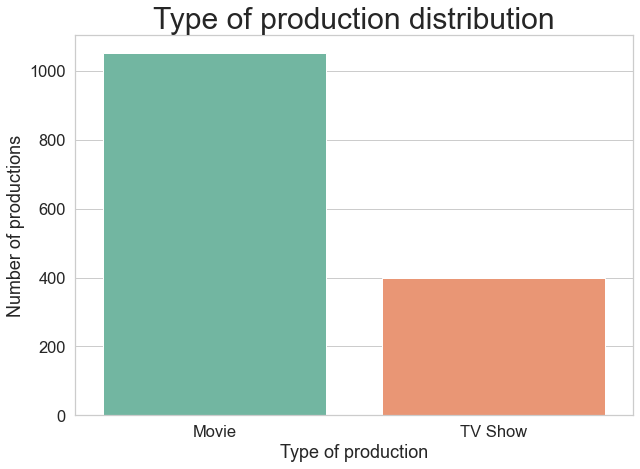

In [121]:
plt.figure(figsize=(10, 7))

plt.title('Type of production distribution', size=30)

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

sns.countplot(df['type'], palette='Set2').set(xlabel='Type of production', ylabel='Number of productions')
plt.show()

## Is the production co-produced?

Text(0.5, 1.0, 'Is the production co-produced?')

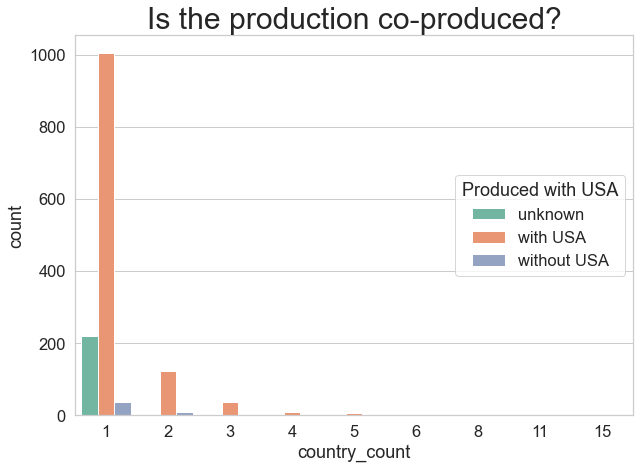

In [122]:
plt.figure(figsize=(10, 7))

#calculating number of coutries that took part in producting show by adding new column with numbers of countries

df['country_count']= df['country'].astype(str).str.split(',').apply(len)

is_usa = []

for row in df['country'].astype(str):
    if 'United States' in row:
        is_usa.append('with USA')
    elif 'unknown' in row:
        is_usa.append('unknown')
    else:
        is_usa.append('without USA')

df['prod_with_usa'] = is_usa

    
#plotting
sns.set_style("whitegrid")

sns.countplot(x=df['country_count'], hue = df['prod_with_usa'], palette='Set2')

plt.legend(loc='center right', title='Produced with USA')
plt.title('Is the production co-produced?', size=30)

In [123]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,country_count,prod_with_usa
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",unknown,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,1,unknown
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",unknown,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,1,unknown
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,1,with USA
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",unknown,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",1,unknown
4,s5,TV Show,The Beatles: Get Back,unknown,"John Lennon, Paul McCartney, George Harrison, ...",unknown,"November 25, 2021",2021,unknown,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,1,unknown


We can see, that most of the productions are produced by one country, but there are several positions coproduced mainly by 2 countries, but due to huge difference between positions produced by one country and coproduced, values for higher number of countries are not visible, so that please check below plot.

Text(0.5, 1.0, 'Is the production co-produced?')

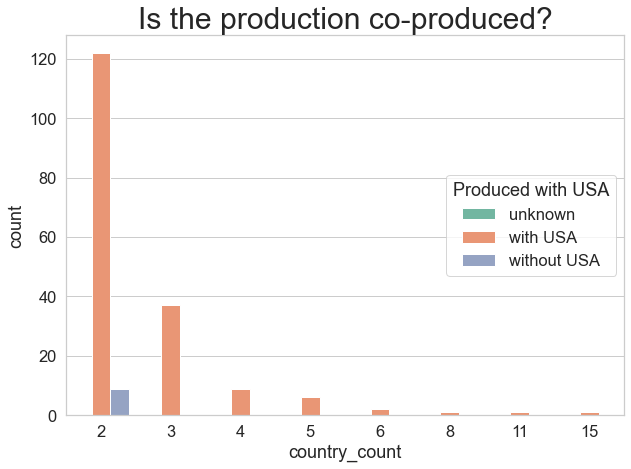

In [124]:
#comparison for co-produced positions

df['country_count']= df['country'].astype(str).str.split(',').apply(len)

is_usa = []

for row in df['country'].astype(str):
    if 'United States' in row:
        is_usa.append('with USA')
    elif 'unknown' in row:
        is_usa.append('unknown')
    else:
        is_usa.append('without USA')

df['prod_with_usa'] = is_usa
    
#plotting
sns.set_style("whitegrid")

coproduced = df['country_count'][df['country_count'] != 1]

plt.figure(figsize=(10, 7))
sns.countplot(x=coproduced, hue = df['prod_with_usa'], palette='Set2')

plt.legend(loc='center right', title='Produced with USA')
plt.title('Is the production co-produced?', size=30)

We can see, that moajority of movies are produced only by USA, but I would like to check what countries exept USA provides the highest number of movies. 

Then, below code point is to find top 20 countries that are not USA and the number of movies are the highest. 

In [ ]:
# 'SHOW LISTED IN GENRE'